## Test that the Policy Gradient model learns to play tic tac toe: 
### 1. 2000 (epochs) x 30 (batch size) > 2*3^9 so the agent will have probably seen every possible board position. 
### 2. learning rate = 0.1

## Baseline model with zero learning(i.e. learning rate set to zero):

In [1]:
import numpy as np
from tic_tac_learning import simulator
from tic_tac_pg import policy_gradients
from clever_stochastician import clever_stochastician as CS
from tic_tac_system import tic_tac_system
from evaluation import game_evaluation as G

G = G()

pg_model = policy_gradients(lr=0.0,seed=42,batch_size=30,p_est = 1)

tic_tac = tic_tac_system(G,model=pg_model,opponent=CS,epochs=2000,depth=5,gamma=0.9)

scores = simulator(tic_tac)

/Users/aidanrockea/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/aidanrockea/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Analyse win-rate progression: 

In [6]:
learning = np.zeros(20)

for i in range(20):
    
    learning[i] = np.mean((scores[i*100:(i+1)*100]+5.0)/10)

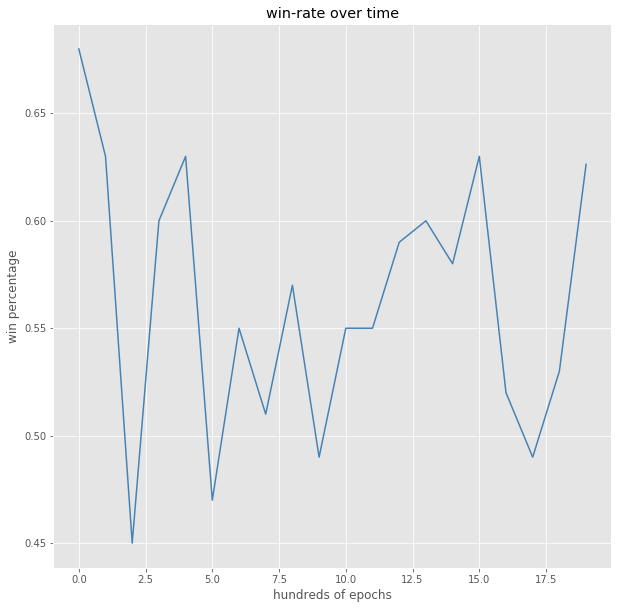

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(10,10)) 

plt.plot(learning,color='steelblue')

plt.title('win-rate over time')
plt.xlabel('hundreds of epochs')
plt.ylabel('win percentage')

plt.show()

In [8]:
np.mean(learning)

0.5623131313131313

## The win-rate is about 56% which is unimpressive. But, zero learning is going on so this is to be expected. 

## 1. Using simple softmax probability calculations: 

In [1]:
import numpy as np
from tic_tac_learning import simulator
from tic_tac_pg import policy_gradients
from clever_stochastician import clever_stochastician as CS
from tic_tac_system import tic_tac_system
from evaluation import game_evaluation as G

G = G()

pg_model = policy_gradients(lr=0.1,seed=42,batch_size=30,p_est = 1)

tic_tac = tic_tac_system(G,model=pg_model,opponent=CS,epochs=2000,depth=5,gamma=0.9)

scores = simulator(tic_tac)

/Users/aidanrockea/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/aidanrockea/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Analyse the win-rate progression: 

In [2]:
learning = np.zeros(20)

for i in range(20):
    
    learning[i] = np.mean((scores[i*100:(i+1)*100]+5.0)/10)

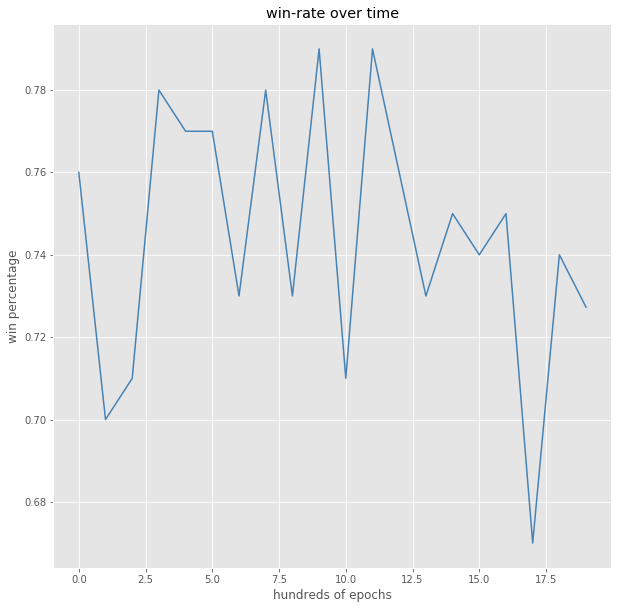

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(10,10)) 

plt.plot(learning,color='steelblue')

plt.title('win-rate over time')
plt.xlabel('hundreds of epochs')
plt.ylabel('win percentage')

plt.show()

In [4]:
np.mean(learning)

0.7443636363636363

### The win rate appears to oscillate but it's about 74% on average. Might it stabilise after enough epochs or a larger batch size?

## 2. Using annealed softmax probability calculations(i.e. decreasing temperature): 

In [1]:
import numpy as np
from tic_tac_learning import simulator
from tic_tac_pg import policy_gradients
from clever_stochastician import clever_stochastician as CS
from tic_tac_system import tic_tac_system
from evaluation import game_evaluation as G

G = G()

pg_model = policy_gradients(lr=0.1,seed=42,batch_size=30,p_est = 2)

tic_tac = tic_tac_system(G,model=pg_model,opponent=CS,epochs=2000,depth=5,gamma=0.9)

scores = simulator(tic_tac)

/Users/aidanrockea/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/aidanrockea/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Analyse the win-rate progression: 

In [2]:
learning = np.zeros(20)

for i in range(20):
    
    learning[i] = np.mean((scores[i*100:(i+1)*100]+5.0)/10)

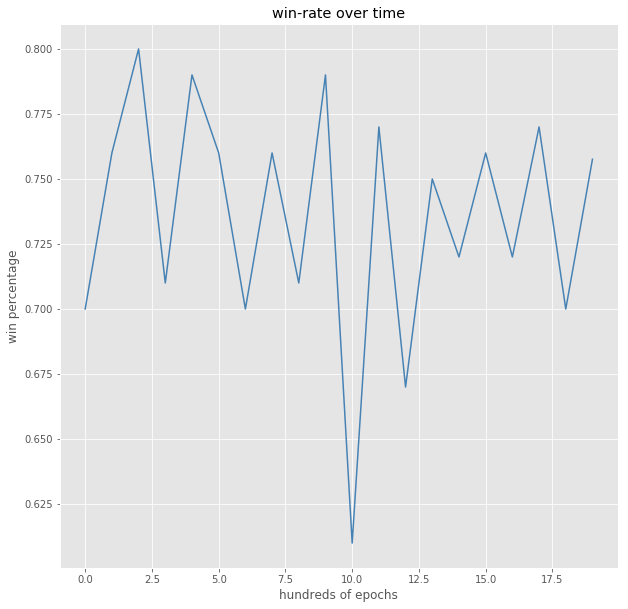

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(10,10)) 

plt.plot(learning,color='steelblue')

plt.title('win-rate over time')
plt.xlabel('hundreds of epochs')
plt.ylabel('win percentage')

plt.show()

In [4]:
np.mean(learning)

0.7353787878787879

## 3. Using the maximum softmax probability: 

In [1]:
import numpy as np
from tic_tac_learning import simulator
from tic_tac_pg import policy_gradients
from clever_stochastician import clever_stochastician as CS
from tic_tac_system import tic_tac_system
from evaluation import game_evaluation as G

G = G()

pg_model = policy_gradients(lr=0.1,seed=42,batch_size=30,p_est = 3)

tic_tac = tic_tac_system(G,model=pg_model,opponent=CS,epochs=2000,depth=5,gamma=0.9)

scores = simulator(tic_tac)

/Users/aidanrockea/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/aidanrockea/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Analyse the win-rate progression: 

In [2]:
learning = np.zeros(20)

for i in range(20):
    
    learning[i] = np.mean((scores[i*100:(i+1)*100]+5.0)/10)

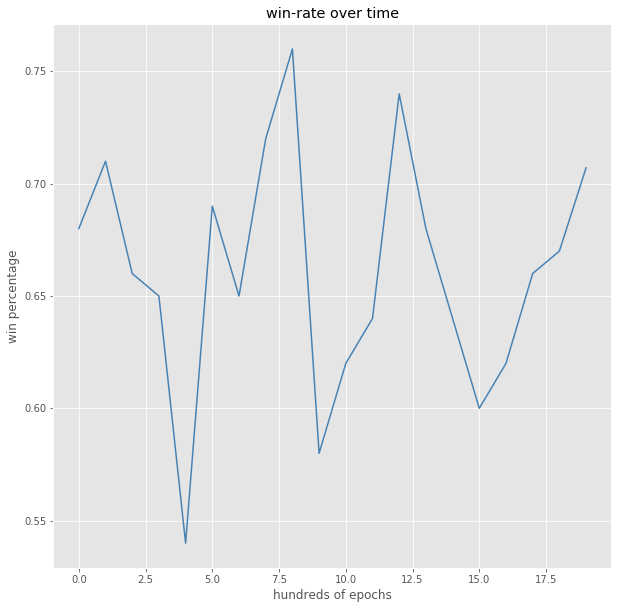

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(10,10)) 

plt.plot(learning,color='steelblue')

plt.title('win-rate over time')
plt.xlabel('hundreds of epochs')
plt.ylabel('win percentage')

plt.show()

In [4]:
np.mean(learning)

0.6608535353535354

### In all three cases, learning appears to be really unstable but the simple softmax method appears to have the greatest meta-stability. 